In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
data=pd.read_csv("australian.csv.dat")

In [3]:
data

,1,22.08,11.46,2,4,4.1,1.585,0,0.1,0.2,1.1,2.1,100,1213,0.3
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
data.isna().sum()

1        0
22.08    0
11.46    0
2        0
4        0
4.1      0
1.585    0
0        0
0.1      0
0.2      0
1.1      0
2.1      0
100      0
1213     0
0.3      0
dtype: int64

In [5]:
X = data.iloc[:, :-1].values      
Y = data.iloc[:, [-1]].values.reshape(-1)

d. Use min-max normalization to bring all features in similar range.


In [6]:
scaler=StandardScaler().fit(X) #fit data for standardizati
scaler.transform(X) 

array([[-1.4503805 , -0.75220801,  0.45277175, ...,  0.23800995,
        -0.14022253, -0.19521767],
       [-1.4503805 , -0.168975  , -0.60322566, ...,  0.23800995,
         0.55692711, -0.19521767],
       [-1.4503805 , -0.83661221,  1.35791239, ...,  0.23800995,
        -1.06975537, -0.19521767],
       ...,
       [-1.4503805 , -1.07632014,  0.96367335, ...,  0.23800995,
        -0.48879734, -0.19521767],
       [-1.4503805 , -0.35128807,  1.96133948, ...,  0.23800995,
        -0.37260574, -0.19310638],
       [ 0.68947424,  0.79492095, -0.9471791 , ..., -3.10870136,
         2.18360958, -0.19521767]])

2. Split the dataset into training and testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

Apply SVM classifier using SVC function
a. The parameters can be linear kernel and C value.
b. For different values of parameter ‘C’, plot the accuracy of the test dataset.


In [8]:
from sklearn import svm
clf = svm.SVC(C=1)

clf.fit(X_train, y_train)

SVC(C=1)

In [9]:
ypred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_test, ypred) #get the accuracy of the model

0.6304347826086957

For different values of parameter ‘C’, plot the accuracy of the test dataset.


In [12]:
C = [0.5, 1, 2, 2.5, 3, 3.5, 4]
accuracy = []
for number in C:
    clf = svm.SVC(C=number)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuc = accuracy_score(y_test, ypred)
    accuracy.append(accuc)
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

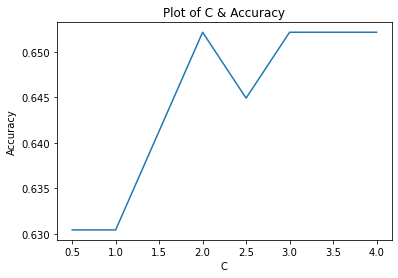

In [13]:
plt.plot(C,accuracy)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Plot of C & Accuracy")
plt.show

4. Does the accuracy change if the kernel function changes? Use Poly kernel as well as 
RBF kernel to check the accuracy

In [ ]:
clf = svm.SVC(kernel= "linear")   #Accuracy for linear Kernel

clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
acc1 =accuracy_score(y_test, ypred)
acc1

In [ ]:
clf = svm.SVC(kernel = "poly")  #Accuaracy for poly kernel
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
acc2 =accuracy_score(y_test, ypred)
acc2
#The accuracy depends on the kernel function